In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

#df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
 #                    columns= iris['feature_names'] + ['target'])

df_iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target']).astype({'target': int}) \
       .assign(species=lambda x: x['target'].map(dict(enumerate(iris['target_names']))))

In [3]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [5]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df_iris.groupby(['species']).size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [7]:
iris_variables = df_iris.drop(['target','species'], axis=1)

In [8]:
iris_variables.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
import warnings
warnings.filterwarnings('ignore')

wcss=[]

#10 clusters
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,max_iter=300)
    kmeans.fit(iris_variables)
    wcss.append(kmeans.inertia_)

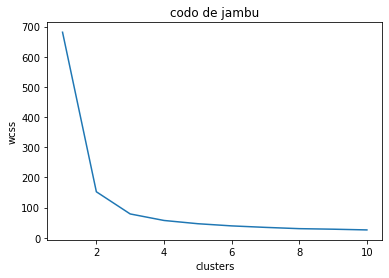

In [10]:
plt.plot(range(1,11),wcss)
plt.title('codo de jambu')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()

In [11]:
clustering = KMeans(n_clusters = 3 , max_iter = 300) 

In [12]:
km = clustering.fit(iris_variables)

In [13]:
df_iris['KMeans_cluster'] = km.labels_
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,KMeans_cluster
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0


In [14]:
df_iris.groupby('KMeans_cluster').size()

KMeans_cluster
0    50
1    62
2    38
dtype: int64

In [15]:
df_iris.groupby(['species','target','KMeans_cluster']).size()

species     target  KMeans_cluster
setosa      0       0                 50
versicolor  1       1                 48
                    2                  2
virginica   2       1                 14
                    2                 36
dtype: int64

In [16]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_iris=pca.fit_transform(iris_variables)
pca_iris_df=pd.DataFrame(data=pca_iris,columns=['Componente_1','Componente_2'])
pca_nombres_flor=pd.concat([pca_iris_df,df_iris[['KMeans_cluster']]],axis=1)

pca_nombres_flor


,Componente_1,Componente_2,KMeans_cluster
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0
...,...,...,...
145,1.944110,0.187532,2
146,1.527167,-0.375317,1
147,1.764346,0.078859,2
148,1.900942,0.116628,2


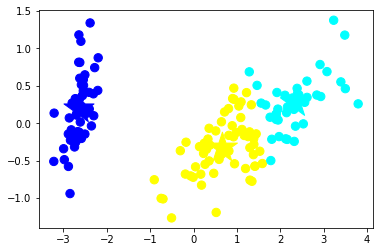

In [17]:
X=np.array(pca_nombres_flor[['Componente_1','Componente_2']])

km_pca = KMeans(n_clusters=3).fit(X)

labels_pca = km_pca.predict(X)

C_pca = km_pca.cluster_centers_

colores_pca=['blue','cyan','yellow']
asignar_pca=[]

for row in labels_pca:
       asignar_pca.append(colores_pca[row])


f1_pca = pca_nombres_flor['Componente_1'].values
f2_pca = pca_nombres_flor['Componente_2'].values
 
plt.scatter(f1_pca, f2_pca, c=asignar_pca, s=70)
plt.scatter(C_pca[:, 0], C_pca[:, 1], marker='*', c=colores_pca, s=1000)
plt.show()

AGRUPAMIENTO JERARQUICO

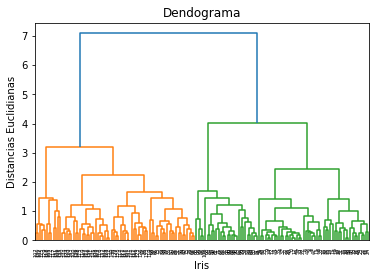

In [18]:
datos= iris_variables.values

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(datos, method = 'complete'))

plt.title('Dendograma')
plt.xlabel('Iris')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

seed=7
kmeans_hc = KMeans(n_clusters=3, random_state=seed)

iris_matrix = iris_variables
labels_hc = kmeans_hc.fit_predict(iris_matrix)
adj_rand_score = adjusted_rand_score(df_iris['target'], labels_hc)

adj_rand_score



0.7302382722834697

In [20]:
val_silhouette = []

for n in range(2,11):
    hcl = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='complete')
    labels_loop = hcl.fit_predict(iris_matrix)
    silhouette_avg_ = silhouette_score(iris_matrix, labels_loop)
    adj_rand_score = adjusted_rand_score(df_iris.target.values, labels_loop)
    val_silhouette.append(silhouette_avg_)
    print("n: %d, silhouette score: %f, adj rand score: %f" % (n, silhouette_avg_, adj_rand_score))

n: 2, silhouette score: 0.515983, adj rand score: 0.421989
n: 3, silhouette score: 0.513595, adj rand score: 0.642251
n: 4, silhouette score: 0.499813, adj rand score: 0.589457
n: 5, silhouette score: 0.346174, adj rand score: 0.439881
n: 6, silhouette score: 0.338203, adj rand score: 0.443490
n: 7, silhouette score: 0.329765, adj rand score: 0.418913
n: 8, silhouette score: 0.324025, adj rand score: 0.451749
n: 9, silhouette score: 0.319168, adj rand score: 0.456204
n: 10, silhouette score: 0.302850, adj rand score: 0.446278


In [21]:
for n in range(2,11):
    km_ = KMeans(n_clusters=n, random_state=10)
    labels_ = km_.fit_predict(iris_matrix)
    silhouette_avg = silhouette_score(iris_matrix, labels_, metric='euclidean')
    adj_rand_score = adjusted_rand_score(df_iris.target.values, labels_)
    print("n: %d, silhouette score: %f, adj rand score: %f" % (n, silhouette_avg, adj_rand_score))

n: 2, silhouette score: 0.681046, adj rand score: 0.539922
n: 3, silhouette score: 0.552819, adj rand score: 0.730238
n: 4, silhouette score: 0.498051, adj rand score: 0.649818
n: 5, silhouette score: 0.488749, adj rand score: 0.607896
n: 6, silhouette score: 0.367846, adj rand score: 0.455072
n: 7, silhouette score: 0.358829, adj rand score: 0.474661
n: 8, silhouette score: 0.349011, adj rand score: 0.455911
n: 9, silhouette score: 0.324775, adj rand score: 0.404554
n: 10, silhouette score: 0.319003, adj rand score: 0.379523


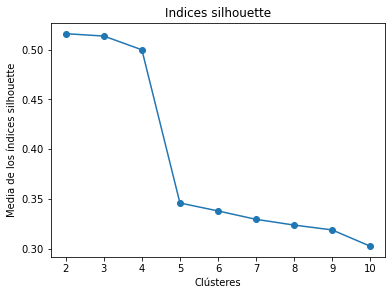

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4.3))
ax.plot(range(2,11), val_silhouette, marker='o')
ax.set_title("Indices silhouette")
ax.set_xlabel('Clústeres')
ax.set_ylabel('Media de los índices silhouette');

KMEANS DIFUSO